# Netflix TV shows and movies dataset
source: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

# Opisanie danych 

Dane składają się z dwóch plików csv, zawierając przy tym informacje o filmach i serialach, które były na stremowane przez Netflix w Stanach Zjednoczonych w Maju 2022 roku. Składają się z tytułów, roku wydania, aktorów, kraju produkcji, rodzaju, popularności według TMBD oraz ocen użytkowników z IMDB. Sposób oceniania popularności filmów jest powierzchownie opisany tutaj:https://developers.themoviedb.org/3/getting-started/popularity. W celach analizy sprawdzimy odpowiedzi na następujące pytania:
* Które filmy są nabardziej popularne
* Liczebność każdego z gatunków filmowych
* Pochodzenie filmów i seriali
* Najlepiej oceniane filmy i seriale
* Najbardziej popularne filmy i seriale
* Najczęściej występujący aktorzy
* Liczebnośc filmów a rok produkcji

Odpowiedzi na powyższe pytania pomogą nam zgłębić jak kształtuje się baza filmów na Netflixie w Stanach Zjednoczonych

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titles = pd.read_csv('titles.csv', )
credits = pd.read_csv('credits.csv')

In [3]:
titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


In [4]:
credits.head(2)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR


Przygotowanie tabeli aktorów ze sprawdzeniem czy nie występują duplikaty - ten sam aktor gra kilka razy w tym samym filmie. Może być taka sytuacja np. w filmie Norbit jeden aktor gra 3 postacie natomiast my nie będziemy brać pod uwagę takich sytuacji i policzymy to jako jeden.

In [5]:
actors = credits[credits['role'] == 'ACTOR']

In [6]:
duplicated = actors.duplicated(subset=['person_id', 'id', 'name'])
actors.duplicated(subset=['person_id', 'id', 'name']).sum()

91

In [7]:
actors = actors[~duplicated]

## Braki danych
Braki danych w seasonach występują przez to, że film nie posiada sezonów. Ta kolumna będzie używana tylko do analizy seriali. nastomaist atrybut określający dla jakiej kategorii jest dany film, nie ma określonego schematu według czego brakuje danych. Z tego powodu zostanie ona usunięta. Pozostałe puste wartości występują dla danych pobranych z IMBD i TMBD. Ponieważ do oceny będziemy brali tylko najlepiej oceniane i najbardziej popularne filmy i seriale to braki danych nie przeszkadzają nam w odpowiedziach na te pytania. Problemem jest brak tytułu w jednej pozycji. Będzie musiała zostać ona usunięta.

seasons                 3759
age_certification       2610
imdb_votes               539
imdb_score               523
imdb_id                  444
tmdb_score               318
tmdb_popularity           94
description               18
title                      1
id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
dtype: int64


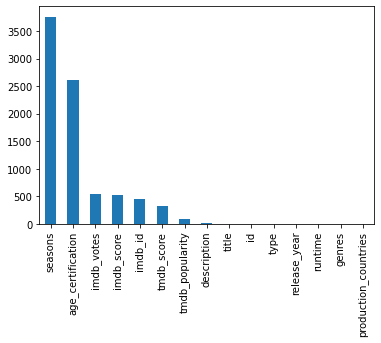

In [8]:
na_titles = titles.isna().sum().sort_values(ascending=False)
na_titles.plot(kind='bar')
print(na_titles)

In [9]:
titles.drop('age_certification', axis=1, inplace=True, errors="ignore")

In [10]:
titles = titles[~titles['title'].isna()]
titles['type'] = titles['type'].str.lower()

### Najbardziej popularne filmy na netflixie

In [11]:
popularity = titles.loc[:, ['title', 'type', 'tmdb_popularity', 'imdb_score']]

movies_popularity = popularity[popularity['type'] == "movie"]
movies_popularity = movies_popularity.sort_values(by='tmdb_popularity', ascending=False).head(10)

show_popularity = popularity[popularity['type'] == "show"]
show_popularity = show_popularity.sort_values(by='tmdb_popularity', ascending=False).head(10)

popularity_graph = pd.concat([movies_popularity, show_popularity])

In [12]:
popularity_graph['title'] = popularity_graph['title'].apply(lambda x: x[0:14] + " ..." if len(x) > 15 else x)

/home/felipe/project_venv/lib64/python3.10/site-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


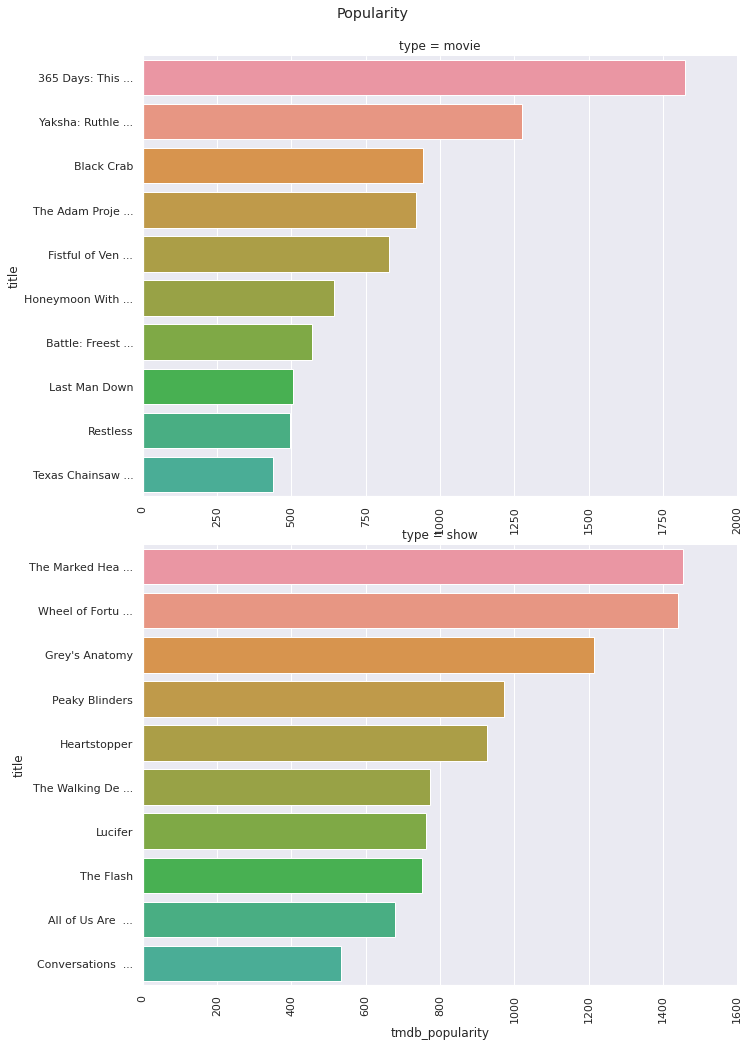

In [61]:
sns.set(rc={'figure.figsize': (20, 10)})
cpp = sns.catplot(y='title',
                 x='tmdb_popularity',
                 data=popularity_graph, 
                 row='type', 
                 kind='bar', 
                 sharex=False,
                 sharey=False,
                 height=7, 
                 aspect=3/2,
                )
cpp.set_xticklabels(rotation=90)
cpp.fig.suptitle("Popularity", y=1.02)
plt.show()

In [14]:
show_score = popularity[popularity['type'] == "show"]
show_score = show_score.sort_values(by='imdb_score', ascending=False).head(10)

movies_score = popularity[popularity['type'] == "movie"]
movies_score = movies_score.sort_values(by='imdb_score', ascending=False).head(10)

score_graph = pd.concat([movies_score, show_score])

In [15]:
score_graph['title'] = score_graph['title'].apply(lambda x: x[0:14] + " ..." if len(x) > 15 else x)

In [16]:
score_graph.loc[:, 'title']

3352    David Attenbor ...
2814    C/o Kancharapa ...
25          No Longer Kids
876     Chhota Bheem & ...
260              Inception
4473    Sky Tour: The  ...
108           Forrest Gump
519     A Lion in the  ...
596             Anbe Sivam
85          Bye Bye London
2927              #ABtalks
656               Khawatir
243           Breaking Bad
259     Avatar: The La ...
3827          Kota Factory
3320            Our Planet
2057             My Mister
1422            Reply 1988
5059    Who Rules The  ...
4847                Arcane
Name: title, dtype: object

/home/felipe/project_venv/lib64/python3.10/site-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


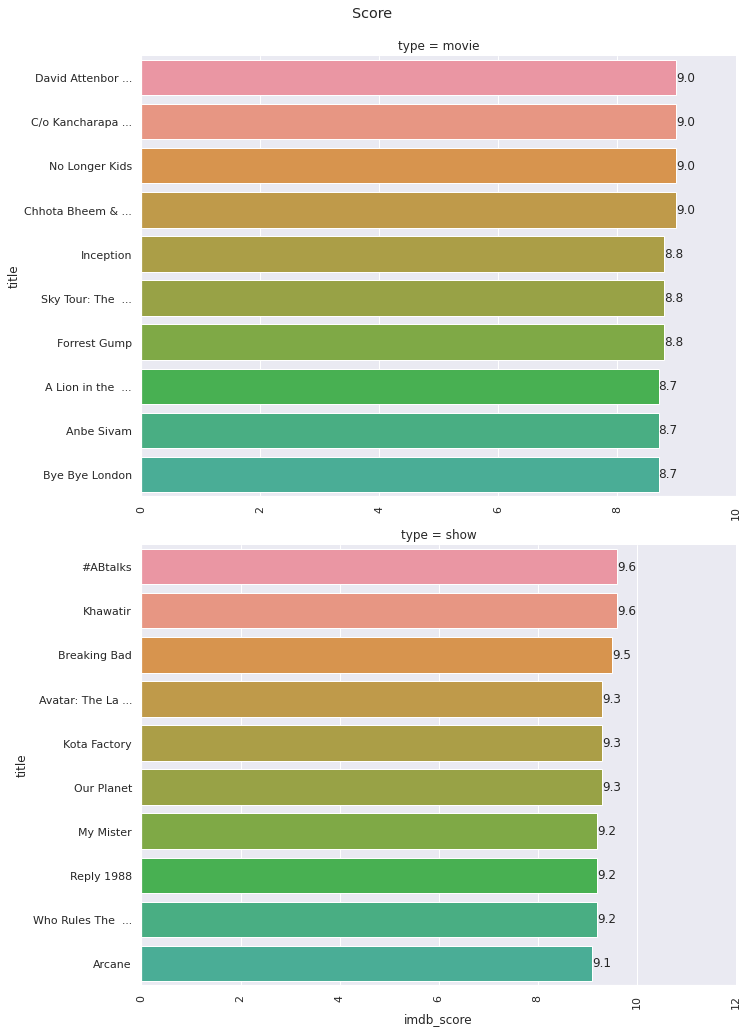

In [63]:
cps = sns.catplot(y='title',
                 x='imdb_score',
                 data=score_graph, 
                 row='type', 
                 kind='bar', 
                 sharey=False, 
                 sharex=False, 
                 height=7, 
                 aspect=3/2,
                )
cps.set_xticklabels(rotation=90)

for index, sscore in enumerate(show_score['imdb_score']):
    cps.facet_axis(1,0).text(sscore, index, str(sscore), va='center')
    
for index, mscore in enumerate(movies_score['imdb_score']):
    cps.facet_axis(0,0).text(mscore, index, str(mscore), va='center')
    
cps.fig.suptitle("Score", y=1.02)
plt.show()

### gatunki filmów i seriali

In [18]:
import re

In [19]:
genre_list = titles.genres.to_list()
list_of_genres = []

In [20]:
for x in genre_list:
    for genre in re.findall("[a-zA-Z]+", x):
        list_of_genres.append(genre)

In [21]:
counted_genres = {}
for genre in set(list_of_genres):
    counted_genres[genre] = 0

In [22]:
for genre in list_of_genres:
    counted_genres[genre] += 1

In [23]:
counted_genres = pd.DataFrame(counted_genres.items(), columns=['gatunek', 'zliczenie'], index=range(1, len(counted_genres) + 1))
counted_genres.sort_values(ascending=False, by='zliczenie', inplace=True)

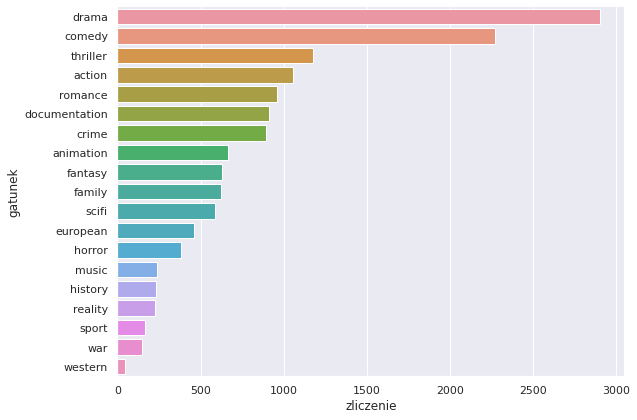

In [24]:
sns.catplot(y='gatunek', x='zliczenie', data=counted_genres, kind='bar', height=6, aspect=1.5)

### rok produkcji a liczba filmów

In [25]:
films_in_years = titles[['release_year']].value_counts()
films_in_years = films_in_years.sort_index(ascending=False).head(20)

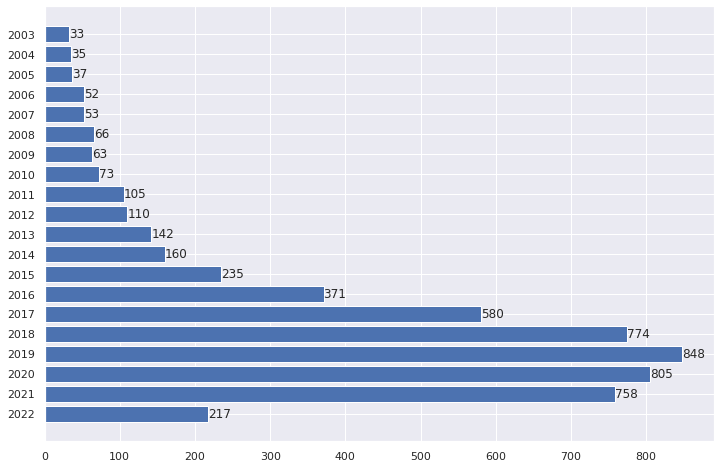

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

ax1 = ax.barh([str(x[0]) for x in films_in_years.index], films_in_years.values)
for y, x in enumerate([str(x[0]) for x in films_in_years.index]):
    ax.text(films_in_years.values[y], x, str(films_in_years.values[y]), va='center')

Możemy zobaczyć, że netflix skupia się raczej na wprowadzaniu nowych filmów, z ostatnich lat a ze strych zapewne pozostawia raczej klasyki dobrze oceniane albo popularne. 

In [27]:
year_score = titles.groupby('release_year').mean()
colors = ['r' if x < np.mean(year_score.imdb_score.iloc[-6:-1]) else 'g' for x in year_score.imdb_score]

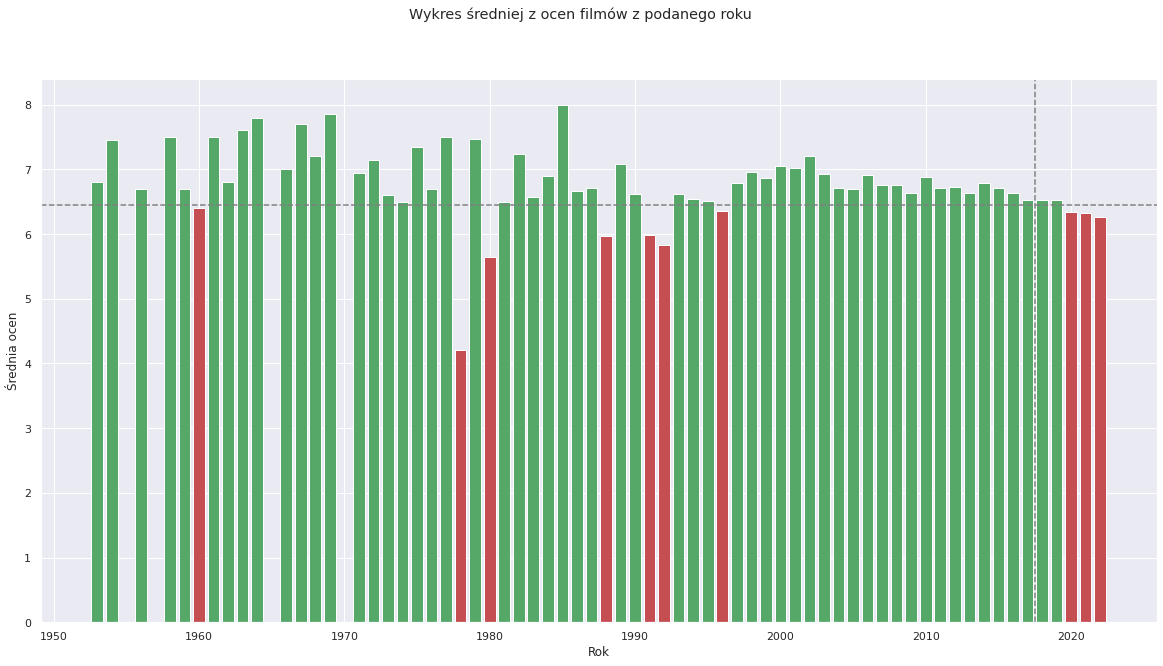

In [28]:
fig, ax = plt.subplots()

ax.bar(year_score.index, year_score.imdb_score, color=colors)
ax.set_xlabel("Rok")
ax.set_ylabel("Średnia ocen")

plt.axhline(np.mean(year_score.imdb_score.iloc[-6:-1]), ls='--', c='gray')
plt.axvline(2017.5, ls='--', c='gray')
plt.suptitle("Wykres średniej z ocen filmów z podanego roku")

plt.show()

Na wykresie powyżej możemy zobaczyć poszczególne lata porównane ze średnią ocen filmów z ostatnich pięciu lat. Na zielono zaznaczone są lata, które miały większą średnią od niej a na czerwono lata, które miały średnią ocen filmów mniejszą. Pomimo pojedyńczych wyjątków można zaobserwować, że z lat wcześniejszych pozostawione zostały tylko filmy, które mają wyższe oceny na imbd.

### Najpopularniejsi aktorzy

In [29]:
most_popular_actors = pd.DataFrame(actors['name'].value_counts().head(20)).reset_index()
most_popular_actors.columns = ['name', 'count']

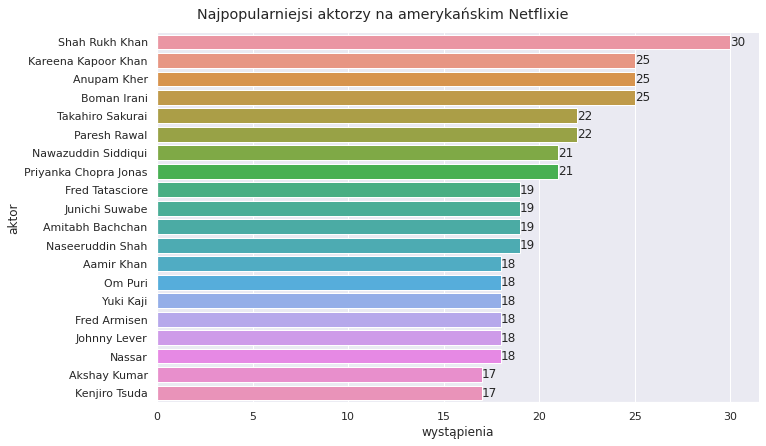

In [30]:
g = sns.catplot(y='name', x='count', data=most_popular_actors, kind='bar', height=6, aspect=1.8)
for x, y in enumerate(most_popular_actors['count']):
    g.facet_axis(0, 0).text(y, x, str(y), va='center')
    
g.set(xlabel="wystąpienia", ylabel="aktor")
g.fig.suptitle("Najpopularniejsi aktorzy na amerykańskim Netflixie", y=1.03)
plt.show()

Najpopularniejszym aktorem na Amerykańskim Netflixie jest Shah Rukh Khan, który występuje tam w aż 30 filmach.

### Pochodzenie filmów i seriali

In [31]:
show_production = titles[titles['type'] == 'show']['production_countries']
movie_production = titles[titles['type'] == 'movie']['production_countries']

In [32]:
country_list_show = re.findall('[A-Z]+', " ".join(show_production))
country_list_movie = re.findall('[A-Z]+', " ".join(movie_production))

In [33]:
show_country_counted = {}
movie_country_counted = {}

for country in country_list_show:
    try:
        show_country_counted[country] += 1
    except KeyError:
        show_country_counted[country] = 1
        
for country in country_list_movie:
    try:
        movie_country_counted[country] += 1
    except KeyError:
        movie_country_counted[country] = 1

df_show = {'Country': show_country_counted.keys(), 'Count': show_country_counted.values()}
df_movie = {'Country': movie_country_counted.keys(), 'Count': movie_country_counted.values()}

In [49]:
country_counted_show = pd.DataFrame(df_show, index=range(1, len(show_country_counted)+1)).sort_values('Count', ascending=False).head(10)
country_counted_movie = pd.DataFrame(df_movie, index=range(1, len(movie_country_counted)+1)).sort_values('Count', ascending=False).head(10)

In [50]:
country_counted_show['type'] = 'show'
country_counted_movie['type'] = 'movie'
country_counted = pd.concat([country_counted_show, country_counted_movie]) 

/home/felipe/project_venv/lib64/python3.10/site-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


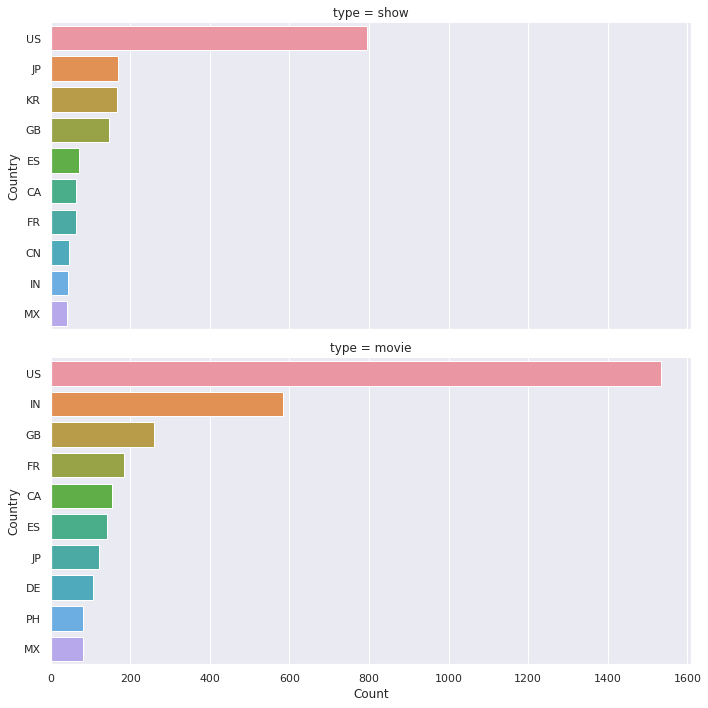

In [51]:
sns.catplot(x='Count', y='Country', data=country_counted, row='type', kind='bar', sharey=False, aspect=2)

Najwięcej seriali pochodzi z USA a następnie z Japoni i Korei, co może wskazywać, że duża część seriali jest typu animacji, ponieważ ten gatunek w głównej mierze pochodzi właśnie z tych dwóch krajów.

Filmy na Netflixie również w większości pochodzą z USA nastomiast kolejnymi dwoma krajami są Indie i Anglia (GB).

## Podsumowanie

* Netflix w USA skupia się aby posiadać jak najwięcej nowych filmów a ze starszych pozostawia tylko te, które mają bardzo dobre oceny wystawiane przez użytkowników.
* Najbardziej popularnym gatunkiem jest dramat a następnie komedia i thriller
* Filmy i seriale głównie pochodzą z USA, następnie seriale pochodzą z Japonii i Korei a filmy z Indii i Angli.
* Najczęściej występujący aktorzy na netflixie to Shah Rukh Khan, Kareena Kapoor Kahn, Anupam Kner.
* Najbardziej popularne filmy na netflixie to 365 days: this day, oraz Yaksha ruthless operations a najbardziej popularne seriale to The Marked Hea
* Najlpiej oceniane filmy na neflixie to David Attenborough: A Life on Our Planet i C/o Kancharapalem a najlepiej oceniane seriale to #ABtalks i Khawatir.